### Importing Libraries

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes


### Data Reading 

In [39]:
df = pd.read_csv('/home/manan/Desktop/Research/Learning-Perspectives/code/bstr.txt', sep=" ")

# changing the value of heads using the values in teacher's note
teachers_keywords = "/home/manan/Desktop/Research/Learning-Perspectives/data/data_notes/25n.txt"
heads = set()
openfile = open(teachers_keywords,'r')
readtext = openfile.read()
# reading into head
a = ""
for i in readtext:
    if i!=',':
        a = a+i
    else:
        heads.add(a)
        a = ""
heads.add("null")
# changin colomuns into head
df.columns = heads
# cleaning
df = df.drop(columns="xp model ",axis=0)

In [40]:
print(df.columns)

Index(['reflects ', 'unnecessary code ', 'iterative progress ',
       'new applications ', 'oo extreme ', 'previous day ',
       'backlog refinement sprint backlog ', 'program development projects ',
       'agile models ', 'software development ',
       ...
       'short standup meeting ', 'release cycles ',
       'principles of waste elimination ', 'corrects errors ',
       'customer feedback ', 'hour oo ', 'team members ', 'tim oo ',
       'system components flow ', 'simple premise '],
      dtype='object', length=239)


In [41]:
print(df.head())

   reflects   unnecessary code   iterative progress   new applications   \
0          0                  0                    0                  0   
1          0                  0                    0                  0   
2          0                  0                    0                  0   
3          0                  0                    0                  0   
4          0                  0                    0                  0   

   oo extreme   previous day   backlog refinement sprint backlog   \
0            0              0                                   0   
1            0              0                                   0   
2            0              0                                   0   
3            0              0                                   0   
4            0              0                                   0   

   program development projects   agile models   software development   ...  \
0                              0              0        

### Data Inspection

In [42]:
df.shape

(52, 239)

In [43]:
df.describe

<bound method NDFrame.describe of     reflects   unnecessary code   iterative progress   new applications   \
0           0                  0                    0                  0   
1           0                  0                    0                  0   
2           0                  0                    0                  0   
3           0                  0                    0                  0   
4           0                  0                    0                  0   
5           0                  0                    0                  0   
6           0                  0                    0                  0   
7           0                  0                    1                  0   
8           0                  0                    0                  0   
9           0                  0                    0                  0   
10          0                  0                    0                  0   
11          1                  1                    1 

### Using K-Mode with "Cao" initialization

In [44]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 779.0


In [45]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns

In [46]:
clusterCentroidsDf

,reflects,unnecessary code,iterative progress,new applications,oo extreme,previous day,backlog refinement sprint backlog,program development projects,agile models,software development,...,short standup meeting,release cycles,principles of waste elimination,corrects errors,customer feedback,hour oo,team members,tim oo,system components flow,simple premise
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,1,0,0,0,0,...,1,1,1,0,0,0,1,1,1,0


### Using K-Mode with "Huang" initialization

In [47]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 955.0
Run 1, iteration: 2/100, moves: 3, cost: 955.0


In [48]:
fitClusters_huang

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=uint16)

### Testing Using Elbow Method

In [49]:
cost = []
for num_clusters in list(range(1,15)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1039.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 779.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 736.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 703.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 673.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 621.0
Run 1, iteration: 2/100, moves: 0, cost: 621.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 602.0
Init: initializing centroids
Init: initializing clusters
Starti

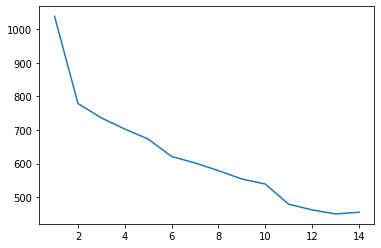

In [50]:
y = np.array([i for i in range(1,15)])
plt.plot(y,cost)

#### Value aroud 9-10 seems to be working fine

In [51]:
km_cao = KModes(n_clusters=9, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 554.0
Run 1, iteration: 2/100, moves: 0, cost: 554.0


In [52]:
fitClusters_cao

array([0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 1, 7, 0, 0, 5, 0, 0, 0, 6, 0, 0,
       3, 1, 0, 0, 0, 5, 2, 0, 5, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=uint16)

In [53]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns

In [54]:
clusterCentroidsDf

,reflects,unnecessary code,iterative progress,new applications,oo extreme,previous day,backlog refinement sprint backlog,program development projects,agile models,software development,...,short standup meeting,release cycles,principles of waste elimination,corrects errors,customer feedback,hour oo,team members,tim oo,system components flow,simple premise
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,1,0,0,0,0,...,1,1,1,0,0,0,1,1,1,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
